<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team-1/blob/main/Reto/Reto_Equipo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maestría en Inteligencia Artificial Aplicada
##Curso: Ciencia y analítica de datos
Tecnológico de Monterrey

Semana 9 - RETO PRIMERA PARTE

Prof Maria de la Paz Rico

Equipo 1

Alumno: Joel Orlando Hernández Ramos

Matrícula: A00759664

Alumno: Rafael Sánchez García

Matrícula: A01182780

Fecha de entrega: Noviembre 16th, 2022


#Parte 1

##Load data


In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import collections
import re
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-team-1/main/Reto/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df_AguaSubterranea = pd.read_csv(path,encoding='cp1252')
df_AguaSubterranea.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


##Clean database

In [3]:
df_AguaSubterranea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

We have 5 columns float type and 51 object type. The total items is 1068

In [4]:
df_AguaSubterranea.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

We have 13 columns with NAs values. So we are going to start cleaning them.

Now lets see how many NAs are per column

In [5]:
df_AguaSubterranea.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [6]:
df_AguaSubterranea.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,2020.000000,0.000000,2020.00000,2020.000000,2020.00000,2020.000000,2020.000000
ALC_mg/L,1064.0,235.633759,116.874291,26.64000,164.000000,215.52750,292.710000,1650.000000
CONDUCT_mS/cm,1062.0,1138.953013,1245.563674,50.40000,501.750000,815.00000,1322.750000,18577.000000
SDT_mg/L,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###PERIODO and SDT_mg/L

We can see that all the values from **PERIODO** is 2020 and **SDT_mg/L** is an empty column. We are considering to drop these 2 columns.



In [7]:
df_AguaSubterranea.drop(['PERIODO','SDT_mg/L'], axis = 1, inplace = True)

###Delete NA's 

Reviewing the data we can see that there are some columns that have 1,2,4 and 6 items with NA's, which in total are 30 items. If them are deleted the data base will end with just 1038 items which is the 97.19% of the data, which is enough to represent the dataset.

In [8]:
df_NAsColumns = df_AguaSubterranea[df_AguaSubterranea.columns[df_AguaSubterranea.isna().any()]]
df_NAsColumns.drop(['CONTAMINANTES'],axis = 1, inplace = True)
df_NAsColumns.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'DUR_mg/L',
       'CALIDAD_DUR', 'N_NO3_mg/L', 'CALIDAD_N_NO3'],
      dtype='object')

In [9]:
df_AguaSubterranea.dropna(subset = df_NAsColumns.columns, axis = 0, inplace = True)
df_AguaSubterranea.isna().sum()

CLAVE                     0
SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
ALC_mg/L                  0
CALIDAD_ALC               0
CONDUCT_mS/cm             0
CALIDAD_CONDUC            0
SDT_M_mg/L                0
CALIDAD_SDT_ra            0
CALIDAD_SDT_salin         0
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  0
CALIDAD_DUR               0
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                0
CALIDAD_N_NO3             0
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L               0
CALIDAD_MN          

Now, the last column that we need to clean is **CONTAMINANTES**. Lets start to see what we have inside it

In [10]:
df_AguaSubterranea['CONTAMINANTES'].unique().tolist()

[nan,
 'FLUO,AS,',
 'NO3,',
 'CF,',
 'CONDUC,NO3,',
 'DT,CF,AS,MN,FE,',
 'CONDUC,SDT_ra,SDT_salin,DT,AS,',
 'AS,',
 'DT,CF,PB,FE,',
 'CONDUC,SDT_ra,SDT_salin,DT,',
 'CONDUC,AS,FE,',
 'CONDUC,',
 'CF,FE,',
 'FE,',
 'DT,NO3,',
 'DT,CR,FE,',
 'CF,FE,NO3,',
 'CONDUC,SDT_ra,SDT_salin,DT,CF,FE,',
 'CONDUC,SDT_ra,SDT_salin,DT,FE,',
 'CONDUC,DT,',
 'CONDUC,SDT_ra,SDT_salin,DT,CF,NO3,',
 'CONDUC,SDT_ra,SDT_salin,DT,FE,NO3,',
 'CONDUC,DT,CF,',
 'FLUO,CF,',
 'DT,',
 'FLUO,',
 'FLUO,DT,',
 'CONDUC,SDT_ra,SDT_salin,FLUO,',
 'CR,FE,',
 'ALC,',
 'SDT_ra,SDT_salin,DT,MN,FE,',
 'FLUO,FE,',
 'FLUO,CF,AS,',
 'DT,FE,',
 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,NO3,',
 'CONDUC,SDT_ra,SDT_salin,DT,AS,NO3,',
 'FLUO,DT,AS,',
 'FLUO,CF,AS,FE,',
 'FE,NO3,',
 'ALC,FLUO,',
 'ALC,CONDUC,SDT_ra,SDT_salin,DT,FE,NO3,',
 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,',
 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,NO3,',
 'CONDUC,SDT_ra,SDT_salin,DT,CF,',
 'CONDUC,SDT_ra,SDT_salin,DT,NO3,',
 'CR,',
 'CONDUC,DT,FE,',
 'ALC,CONDUC,DT,',
 'CONDUC,DT,

To explain more in detail this column we can see that it has all the contaminants that are present in the water. So if one of the items does not have a value or is a NA, this is mean that the water is cleaned, so to avoid to have NA's in the database we can replace it with a phrase **UNCONTAMINATED**

In [11]:
df_AguaSubterranea['CONTAMINANTES'].fillna('NINGUNO', inplace=True)
df_AguaSubterranea.isna().values.any()

False

The database does not have any NAs values. Lets start exploring the columns

###Clean mg/L Columns

In [12]:
def dataframeAnalsys(columnName):
  print("\n",columnName)
  print("Type ",df_AguaSubterranea[columnName].dtypes)
  print("String Values")
  print(df_AguaSubterranea[columnName][pd.to_numeric(df_AguaSubterranea[columnName], errors='coerce').isnull()].unique())

In [13]:
def convertStringToValues_ignoringNulls(columnName):
  print("\n",columnName)
  print("Converting dataframe to float...")
  df_AguaSubterranea[columnName] = df_AguaSubterranea[columnName].astype(float, errors='ignore')
  print("String Values remaining:")
  print(df_AguaSubterranea[columnName][pd.to_numeric(df_AguaSubterranea[columnName], errors='coerce').isnull()].unique().tolist())

In [14]:
def convertStringToValues(columnName, stringValue, numericValue):
  print("\nReplacing values...")
  df_AguaSubterranea.loc[ df_AguaSubterranea[columnName] == stringValue, columnName] = numericValue
  print("Converting dataframe to float...")
  df_AguaSubterranea[columnName] = df_AguaSubterranea[columnName].astype(float, errors='ignore')
  print("Type: " , df_AguaSubterranea[columnName].dtypes)


In [15]:
listmgL = ['AS_TOT_mg/L','CD_TOT_mg/L','COLI_FEC_NMP/100_mL','CR_TOT_mg/L','DUR_mg/L','FE_TOT_mg/L','FLUORUROS_mg/L','HG_TOT_mg/L','MN_TOT_mg/L','N_NO3_mg/L','PB_TOT_mg/L','SDT_M_mg/L']

In [16]:
for x in listmgL:
  dataframeAnalsys(x)


 AS_TOT_mg/L
Type  object
String Values
['<0.01']

 CD_TOT_mg/L
Type  object
String Values
['<0.003']

 COLI_FEC_NMP/100_mL
Type  object
String Values
['<1.1']

 CR_TOT_mg/L
Type  object
String Values
['<0.005']

 DUR_mg/L
Type  object
String Values
['<20']

 FE_TOT_mg/L
Type  object
String Values
['<0.025']

 FLUORUROS_mg/L
Type  object
String Values
['<0.2']

 HG_TOT_mg/L
Type  object
String Values
['<0.0005']

 MN_TOT_mg/L
Type  object
String Values
['<0.0015']

 N_NO3_mg/L
Type  object
String Values
['<0.02']

 PB_TOT_mg/L
Type  object
String Values
['<0.005']

 SDT_M_mg/L
Type  object
String Values
[]


First lets convert the string numeric values to float


In [17]:
for x in listmgL:
  convertStringToValues_ignoringNulls(x)


 AS_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.01']

 CD_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.003']

 COLI_FEC_NMP/100_mL
Converting dataframe to float...
String Values remaining:
['<1.1']

 CR_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.005']

 DUR_mg/L
Converting dataframe to float...
String Values remaining:
['<20']

 FE_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.025']

 FLUORUROS_mg/L
Converting dataframe to float...
String Values remaining:
['<0.2']

 HG_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.0005']

 MN_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.0015']

 N_NO3_mg/L
Converting dataframe to float...
String Values remaining:
['<0.02']

 PB_TOT_mg/L
Converting dataframe to float...
String Values remaining:
['<0.005']

 SDT_M_mg/L
Converting dataframe to float...
String Values remaining:
[]


####AS_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.01'], so we are going to replace with 0.01 But first lets convert the numeric values to float

In [18]:
convertStringToValues('AS_TOT_mg/L','<0.01',0.01)


Replacing values...
Converting dataframe to float...
Type:  float64


####CD_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.003'], so we are going to replace with 0.003 But first lets convert the numeric values to float

In [19]:
convertStringToValues('CD_TOT_mg/L','<0.003',0.003)


Replacing values...
Converting dataframe to float...
Type:  float64


####COLI_FEC_NMP/100_mL

We can see that most of the values are numeric however we have string values like ['<1.1'], so we are going to replace with 1.1 But first lets convert the numeric values to float

In [20]:
convertStringToValues('COLI_FEC_NMP/100_mL','<1.1',1.1)


Replacing values...
Converting dataframe to float...
Type:  float64


####CR_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.005'], so we are going to replace with 0.005 But first lets convert the numeric values to float

In [21]:
convertStringToValues('CR_TOT_mg/L','<0.005',0.005)


Replacing values...
Converting dataframe to float...
Type:  float64


####DUR_mg/L

We can see that most of the values are numeric however we have string values like ['<20'], so we are going to replace with 20

In [22]:
convertStringToValues('DUR_mg/L','<20',20)


Replacing values...
Converting dataframe to float...
Type:  float64


####FE_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.025'], so we are going to replace with 0.025

In [23]:
convertStringToValues('FE_TOT_mg/L','<0.025',0.025)


Replacing values...
Converting dataframe to float...
Type:  float64


####FLUORUROS_mg/L

We can see that most of the values are numeric however we have string values like ['<0.2'], so we are going to replace with 0.2

In [24]:
convertStringToValues('FLUORUROS_mg/L','<0.2',0.2)


Replacing values...
Converting dataframe to float...
Type:  float64


####HG_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.0005'], so we are going to replace with 0.0005 But first lets convert the numeric values to float

In [25]:
convertStringToValues('HG_TOT_mg/L','<0.0005',0.0005)


Replacing values...
Converting dataframe to float...
Type:  float64


####MN_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.0015'], so we are going to replace with 0.0015 But first lets convert the numeric values to float

In [26]:
convertStringToValues('MN_TOT_mg/L','<0.0015',0.0015)


Replacing values...
Converting dataframe to float...
Type:  float64


####N_NO3_mg/L

We can see that most of the values are numeric however we have string values like ['<0.02'], so we are going to replace with 0.02 But first lets convert the numeric values to float

In [27]:
convertStringToValues('N_NO3_mg/L','<0.02',0.02)


Replacing values...
Converting dataframe to float...
Type:  float64


####PB_TOT_mg/L

We can see that most of the values are numeric however we have string values like ['<0.005'], so we are going to replace with 0.005 But first lets convert the numeric values to float

In [28]:
convertStringToValues('PB_TOT_mg/L','<0.005',0.005)


Replacing values...
Converting dataframe to float...
Type:  float64


In [29]:
df_AguaSubterranea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1054 non-null   object 
 1   SITIO                 1054 non-null   object 
 2   ORGANISMO_DE_CUENCA   1054 non-null   object 
 3   ESTADO                1054 non-null   object 
 4   MUNICIPIO             1054 non-null   object 
 5   ACUIFERO              1054 non-null   object 
 6   SUBTIPO               1054 non-null   object 
 7   LONGITUD              1054 non-null   float64
 8   LATITUD               1054 non-null   float64
 9   ALC_mg/L              1054 non-null   float64
 10  CALIDAD_ALC           1054 non-null   object 
 11  CONDUCT_mS/cm         1054 non-null   float64
 12  CALIDAD_CONDUC        1054 non-null   object 
 13  SDT_M_mg/L            1054 non-null   float64
 14  CALIDAD_SDT_ra        1054 non-null   object 
 15  CALIDAD_SDT_salin    

###Continue Cleaning

In [30]:
#Caterogoricals
categoricas = ['CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']
#Numericals 
numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

Lets review if the categorical values make sense

In [31]:
for x in categoricas:
  print("\n",x)
  print(df_AguaSubterranea[x].unique().tolist())



 CALIDAD_CONDUC
['Permisible para riego', 'Buena para riego', 'Dudosa para riego', 'Indeseable para riego', 'Excelente para riego']

 CALIDAD_SDT_ra
['Cultivos sensibles', 'Excelente para riego', 'Cultivos con manejo especial', 'Cultivos tolerantes', 'Indeseable para riego']

 CALIDAD_SDT_salin
['Potable - Dulce', 'Ligeramente salobres', 'Salobres', 'Salinas']

 CALIDAD_DUR
['Potable - Dura', 'Muy dura e indeseable usos industrial y domestico', 'Potable - Moderadamente suave', 'Potable - Suave']

 CALIDAD_COLI_FEC
['Potable - Excelente', 'Aceptable', 'Contaminada', 'Buena calidad', 'Fuertemente contaminada']

 CALIDAD_N_NO3
['Potable - Excelente', 'Potable - Buena calidad', 'No apta como FAAP']

 CALIDAD_AS
['Apta como FAAP', 'No apta como FAAP', 'Potable - Excelente']

 CALIDAD_CD
['Potable - Excelente', 'No apta como FAAP']

 CALIDAD_CR
['Potable - Excelente', 'No apta como FAAP']

 CALIDAD_HG
['Potable - Excelente', 'No apta como FAAP']

 CALIDAD_PB
['Potable - Excelente', 'No apta

It seems that all categorical values are correct. So we finish with the clean process

##Data Exploring

Now that we have cleaned our data qwe can visualize it and then describe it to see if it makes sense.

In [32]:
df_AguaSubterraneaCleaned = df_AguaSubterranea.copy()
df_AguaSubterraneaCleaned.head()
#maybe we need to drop CLAVE

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [33]:
df_AguaSubterraneaCleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1054.0,-101.848270,6.697568,-116.66425,-105.385170,-102.170665,-98.971268,-86.864120
LATITUD,1054.0,23.161796,3.875005,14.56115,20.224857,22.640705,25.508770,32.677713
ALC_mg/L,1054.0,234.695266,111.147849,26.64000,164.257500,215.825000,292.930000,1650.000000
CONDUCT_mS/cm,1054.0,1142.726471,1248.990617,110.00000,506.000000,820.000000,1328.000000,18577.000000
SDT_M_mg/L,1054.0,896.945797,2765.757924,101.20000,338.050000,551.400000,915.600000,82170.000000
FLUORUROS_mg/L,1054.0,1.078547,1.931204,0.20000,0.269475,0.506950,1.142400,34.803300
DUR_mg/L,1054.0,349.893584,360.960153,20.00000,121.512000,245.994450,455.617200,3810.692200
COLI_FEC_NMP/100_mL,1054.0,359.734156,2065.705773,1.10000,1.100000,1.100000,10.750000,24196.000000
N_NO3_mg/L,1054.0,4.321651,8.378332,0.02000,0.651667,2.082916,5.190385,121.007813
AS_TOT_mg/L,1054.0,0.019504,0.035051,0.01000,0.010000,0.010000,0.010000,0.452200


After the the description we can see that all counts for the numeric variables are 1054 just as we expected. This means that we no longer have Nan values. With this function we are able to see the distribution of our data. In this case, it is important to highlight that our data seem to have a lot of different ranges. For example, most of the categories referring to the concentrations in miligrams of pollutants per liter are below 1. Their range are not to big and std deviation doesnt seem to be significant either. In contrast, columns like ALC_mg/L, CONDUCT_mS/cm or SDT_M_mg/L have a big range of values, with important standard deviations. 

All these characteristics will have to be taken into consideration during the modelling phase of the project.

As a complement to what we just saw and explained, lets see the histogram from the numeric values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee72002610>,
      dtype=object)

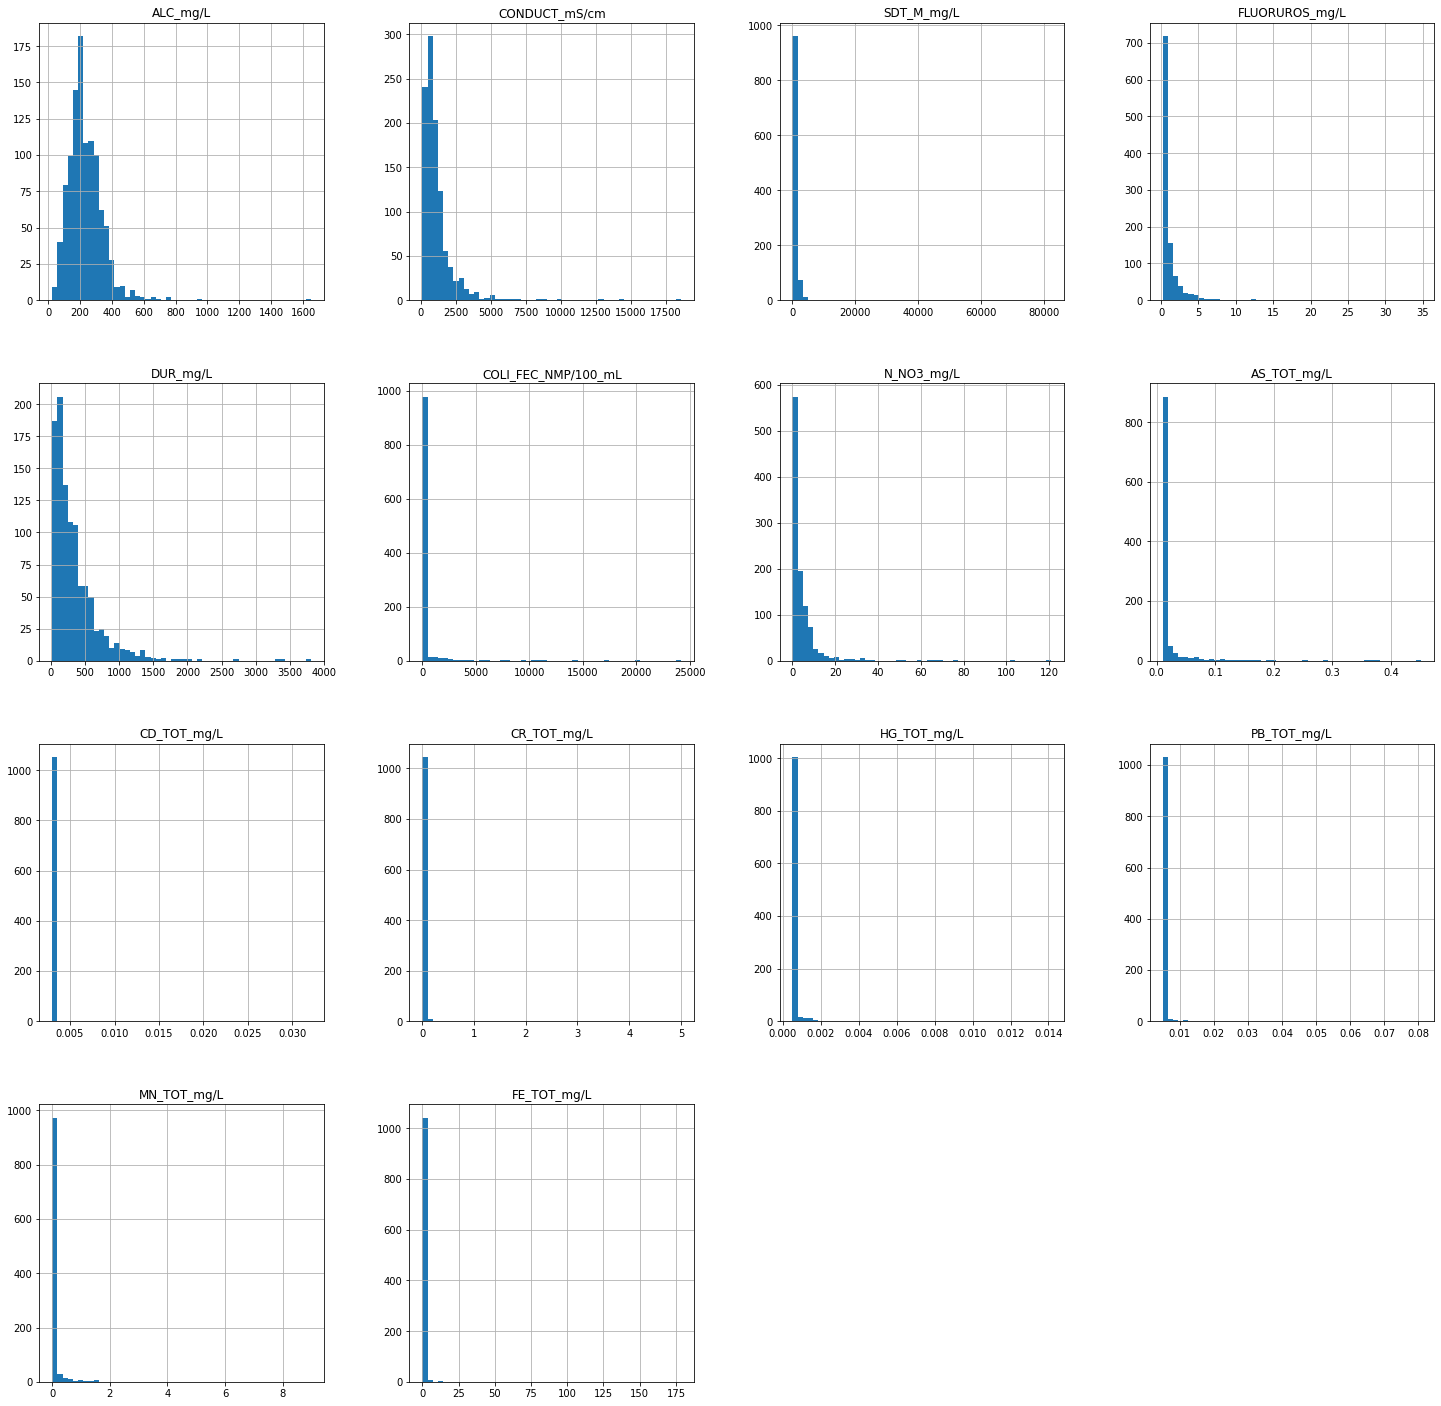

In [34]:
df_AguaSubterraneaCleaned[numericas].hist(bins = 50, figsize=(25,25))

We can see that the data is skewed to the right. Therefore, it might be ideal to try and center our distribution. Below we have showed a transformation option based on cubic root.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee6fb70890>,
      dtype=object)

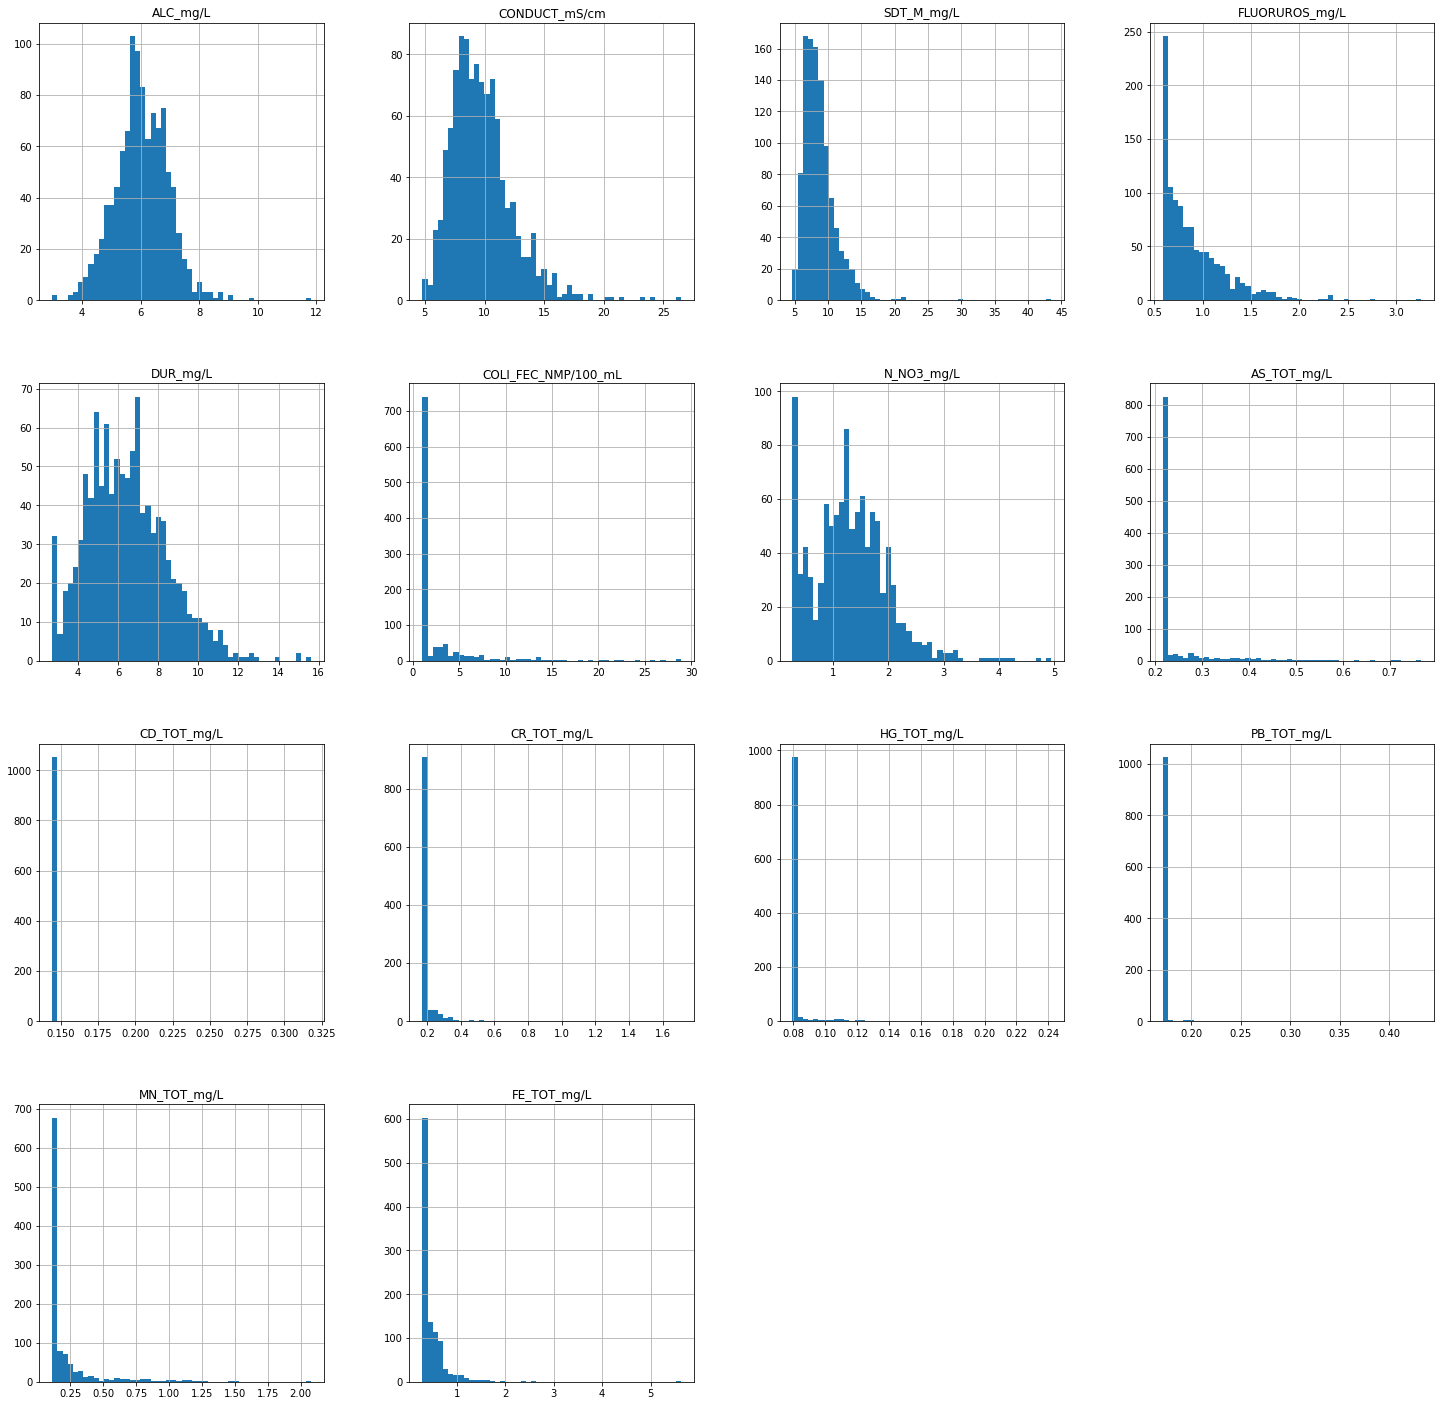

In [35]:
transformed_num_data = np.cbrt(df_AguaSubterraneaCleaned[numericas])

transformed_num_data.hist(bins = 50, figsize=(25,25))

We can notice that after applying cubic root to our numerical values, we have a more centered distribution instead of skewed. 

Below, we can see the boxplots of the transformated data.

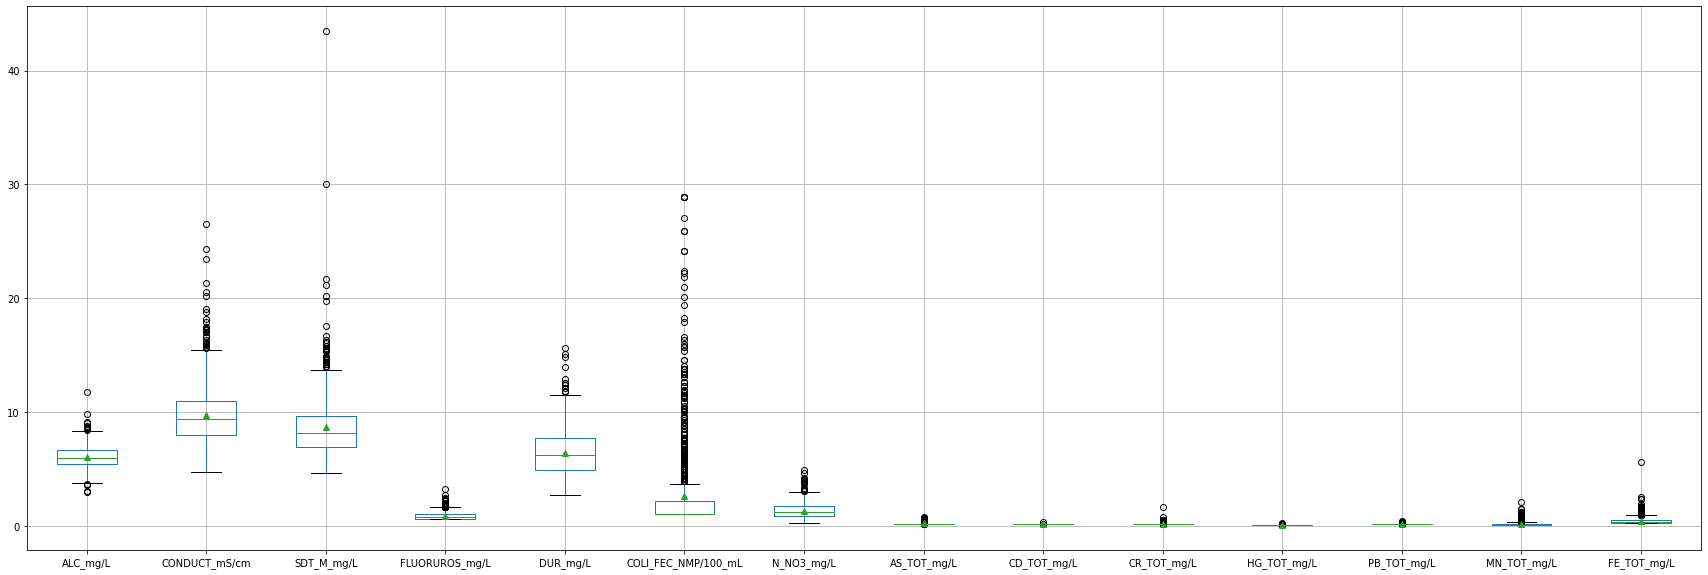

In [36]:
transformed_num_data.boxplot(figsize=(30,10),showmeans=True)

After this first boxplot graph we can see that in most of our data we have a high number of outliers and because, the range of our data is really different, it is hard to visualize the distribution of the last variables. Therefore below we will plot the bloxplot again but only the last variables

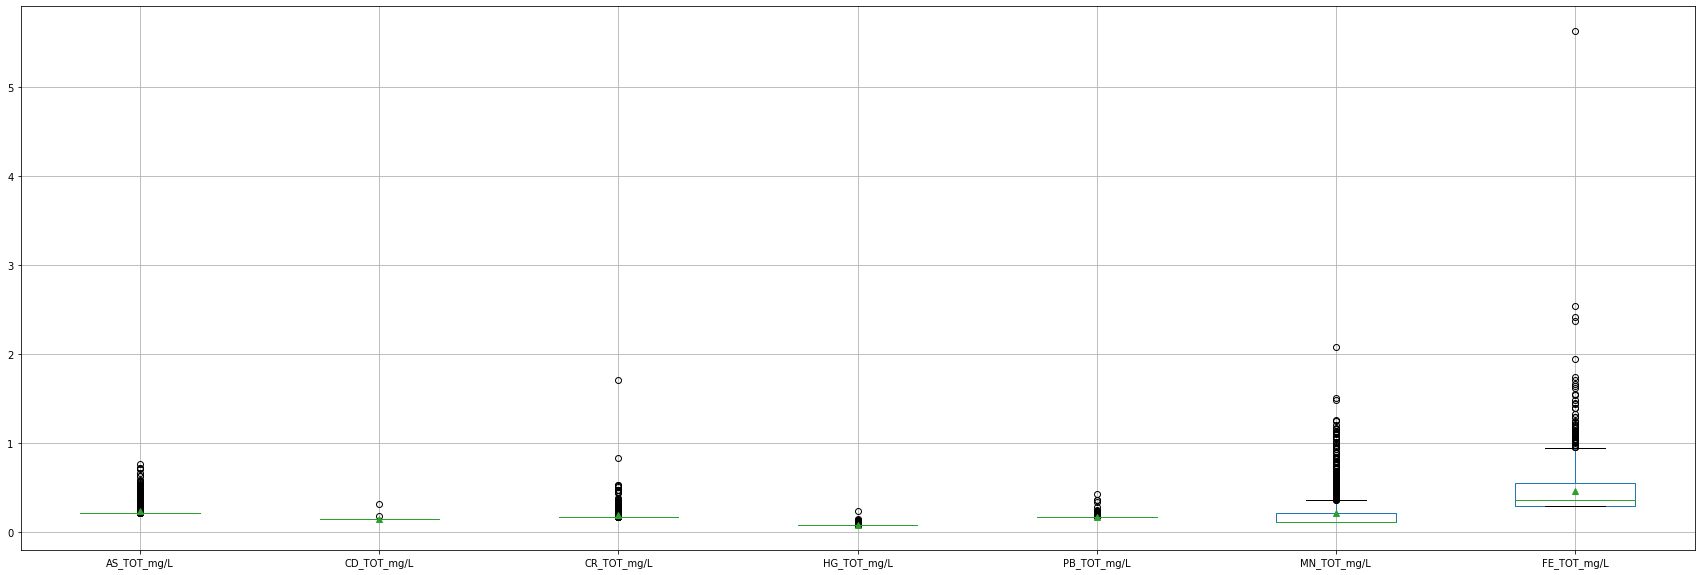

In [37]:
smalldata= transformed_num_data[['AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]
smalldata.boxplot(figsize=(30,10),showmeans=True) 

We still can notice that our data is so small in these last variables that a boxplot cannot be plotted. We should consider this for our model in case we decide to use these columns.

Moving forward we will also plot the categorical values to see what kind of data we have. 

In [38]:
categoricas2=['ORGANISMO_DE_CUENCA',	'ESTADO', 'SEMAFORO']


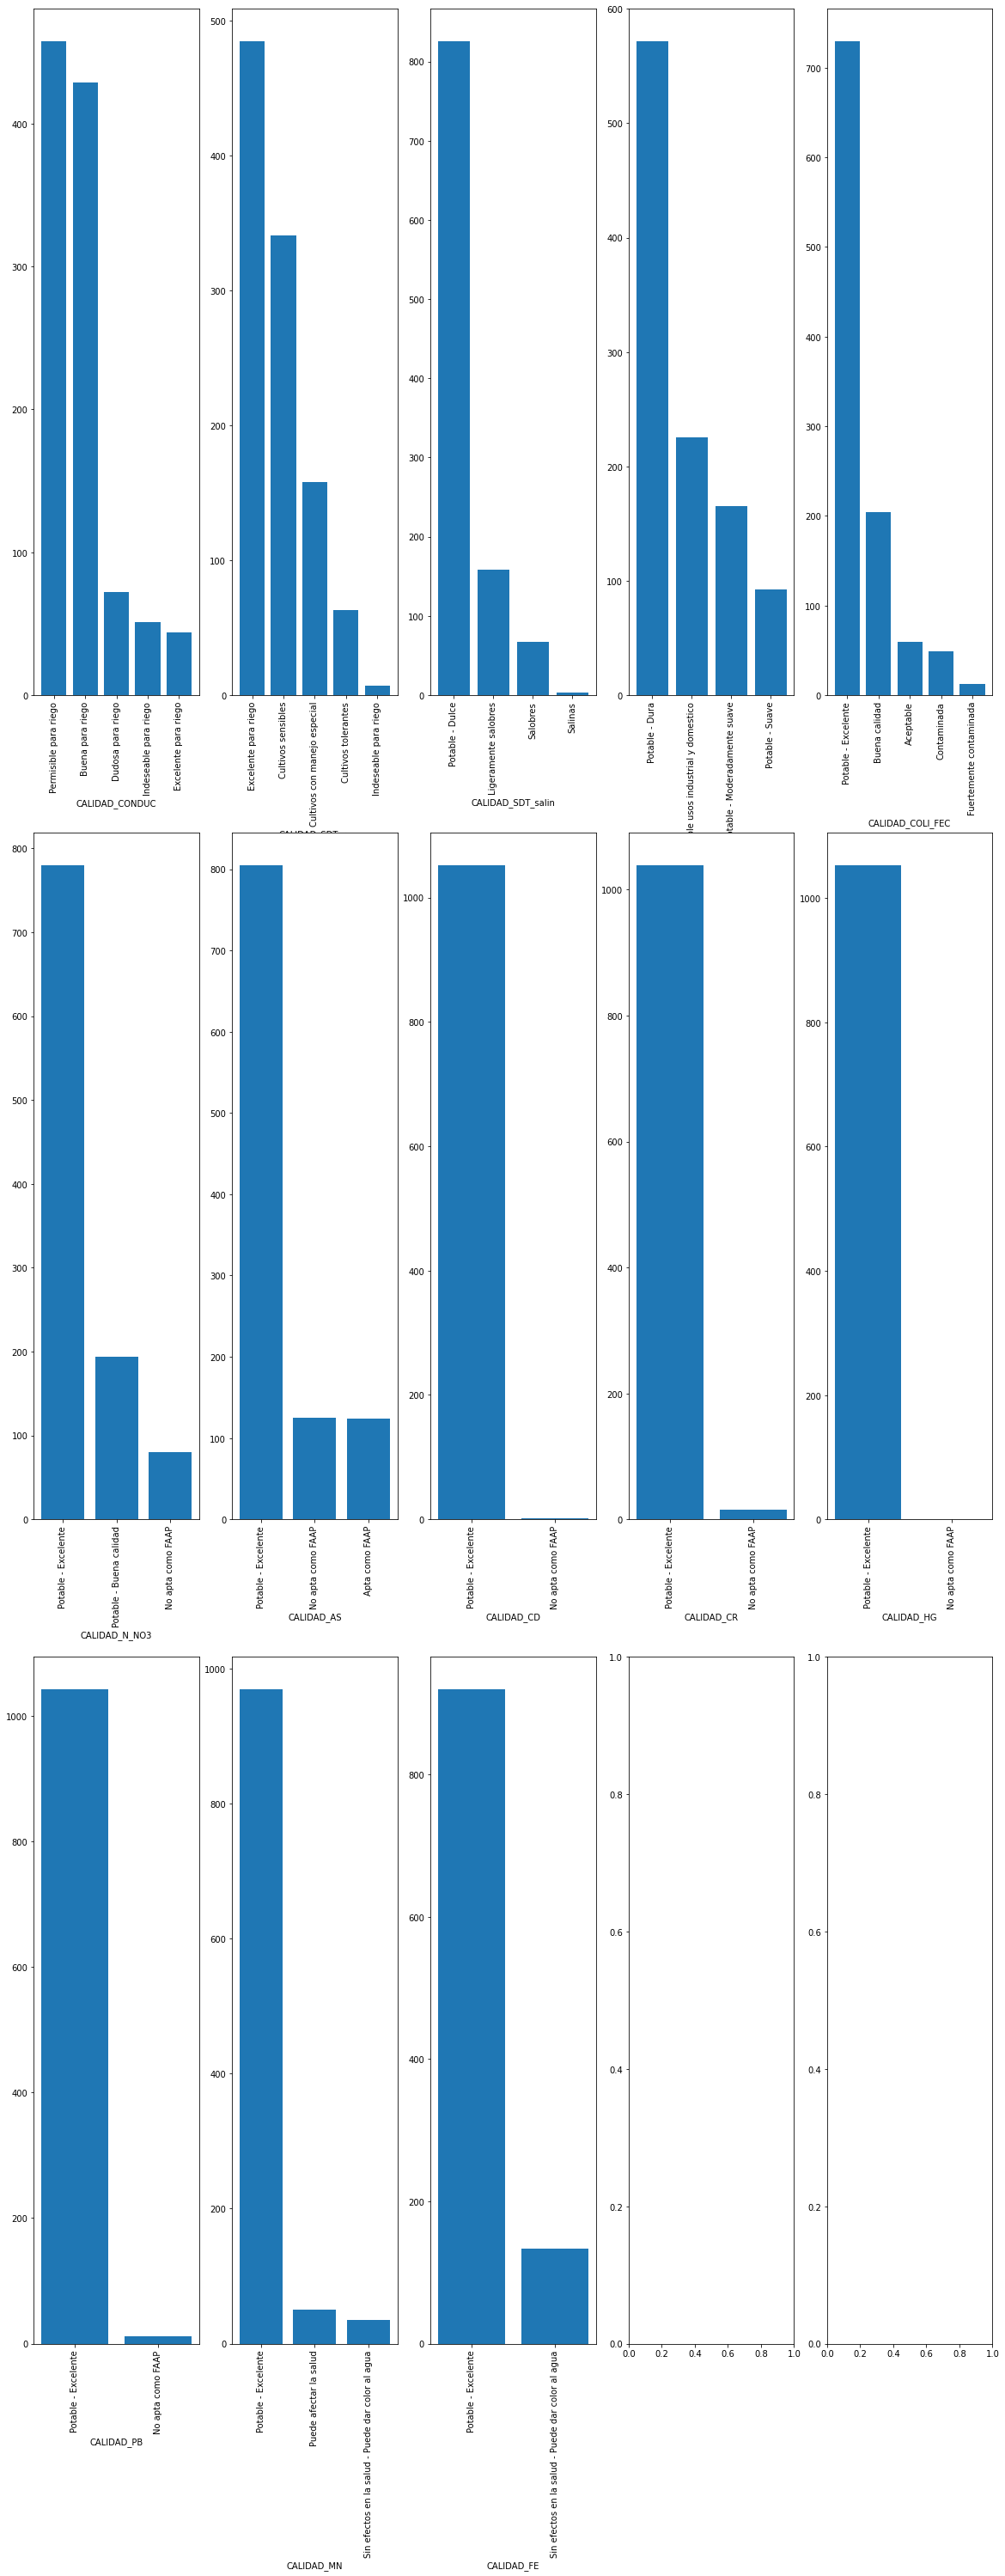

In [39]:
fig, axes = plt.subplots(3, 5, figsize=(20,50)) 
k=0
for category in categoricas:
  k=k+1
  plt.subplot(3,5,k) 
  x=df_AguaSubterraneaCleaned[category].unique()
  y=pd.value_counts(df_AguaSubterraneaCleaned[category])
  plt.bar(y.index,y.values)
  plt.xticks(rotation=90)
  plt.xlabel(category)

We plot finally some geographical data and our output variable 'SEMAFORO'.

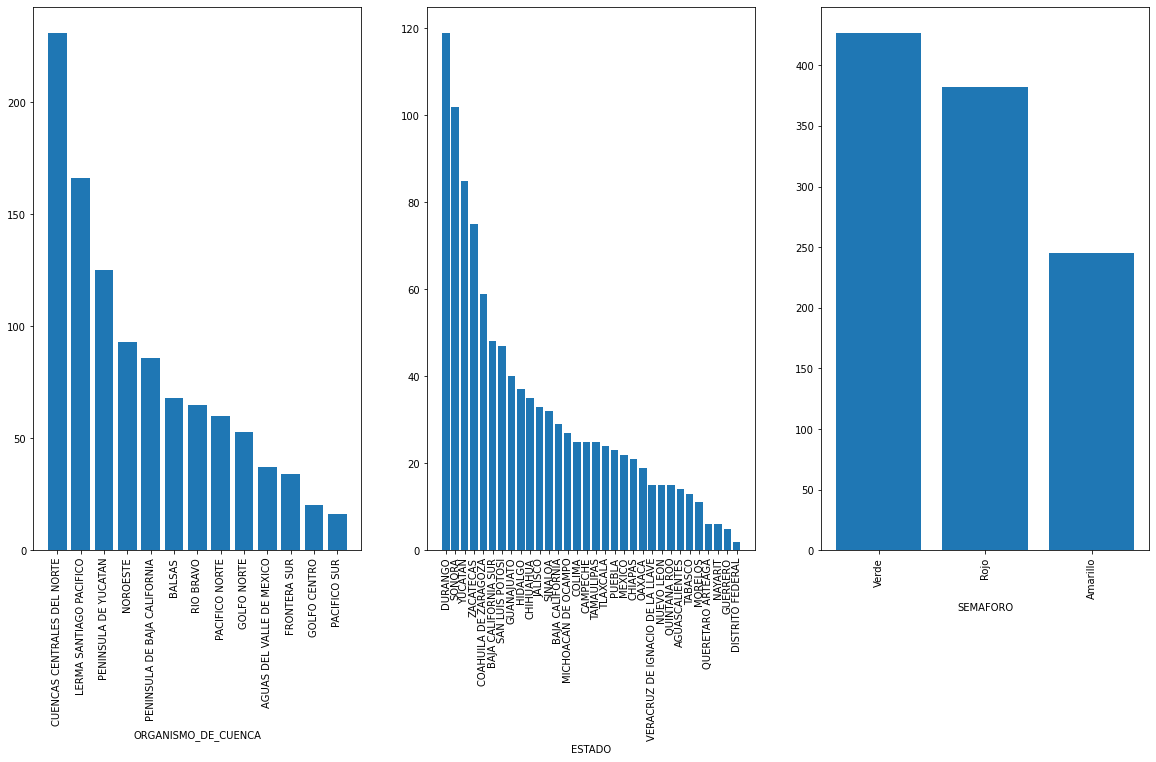

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20,10)) 
k=0
for category in categoricas2:
  k=k+1
  plt.subplot(1,3,k) 
  x=df_AguaSubterraneaCleaned[category].unique()
  y=pd.value_counts(df_AguaSubterraneaCleaned[category])
  plt.bar(y.index,y.values)
  plt.xticks(rotation=90)
  plt.xlabel(category)

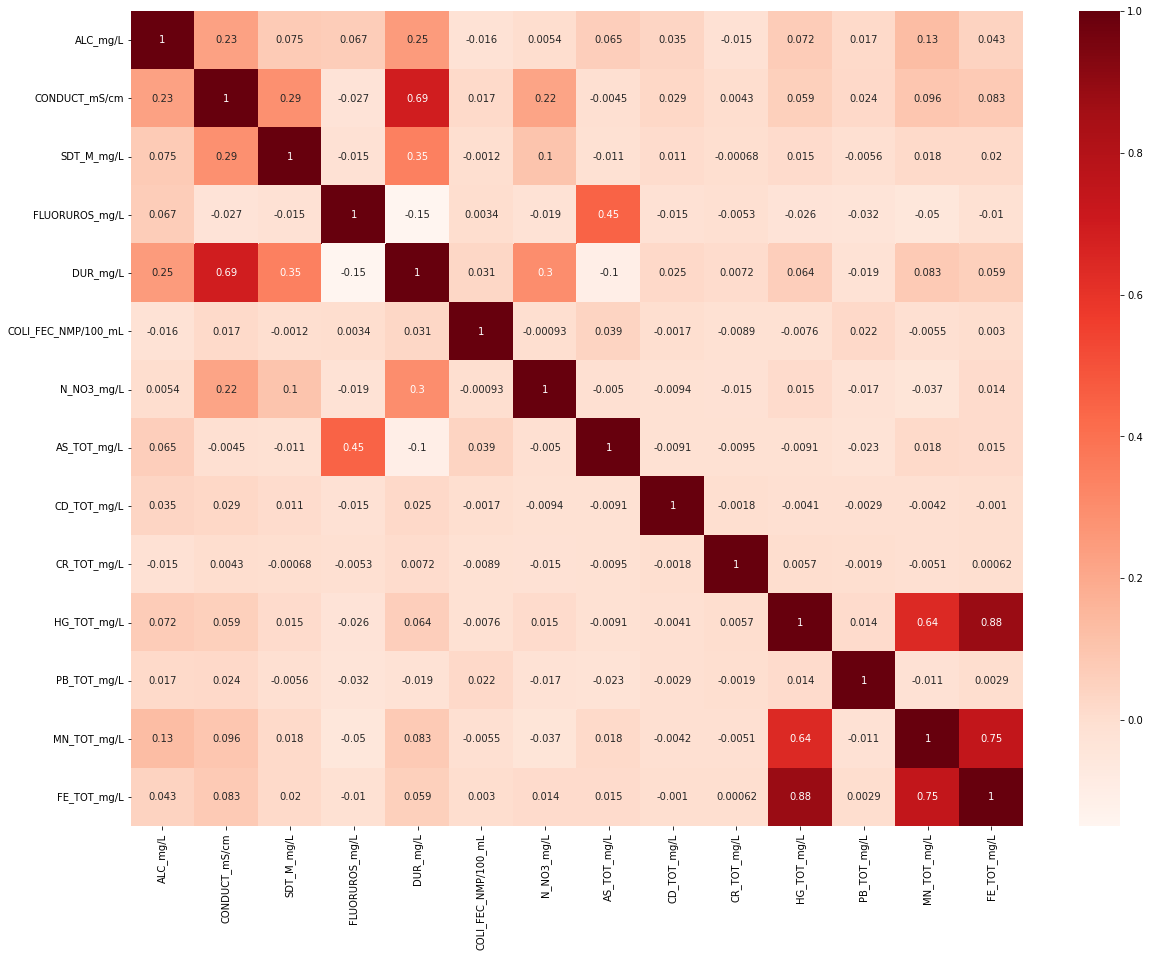

In [41]:
plt.figure(figsize=(20,15))
sns.heatmap(df_AguaSubterraneaCleaned[numericas].corr(), annot=True, cmap='Reds')
plt.show()

As the last graph of our Exploring Data phase we plotted a correlation heatmap. We can see that there are a few variables that are strongly correlated.

##Kmeans

>K Means

In [42]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

We are going to start our K-means analysis with an Elbow Curve to help us decide the amount of clusters we can use. It is important to mention that the Elbow curve is only a helpful way to determine the k value, but it is not mandatory to follow it. 

In [44]:
latlong=df_AguaSubterraneaCleaned[["LATITUD","LONGITUD"]]

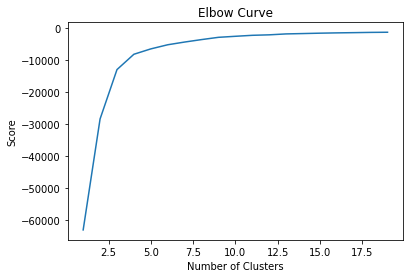

In [45]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

We can see that the best K is 4 according to our Elbow curve. Nevertheless, as a team, we do not believe that the all the geographical information of Mexico's superficial water resources should be explained in only four clusters. Mainly because according to our categorical data distribution, the data base is dividing it in 13 "Cuencas". Therefore, we will use **K = 13**

In [46]:
kmeans = KMeans(n_clusters=13).fit(latlong)
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['LATITUD', 'LONGITUD'])
print(centroids)
labels = kmeans.predict(latlong)
print("\n Esta función nos devuelve el número de instancias en cada cluster")
pd.Series.value_counts(labels)

      LATITUD    LONGITUD
0   19.896940 -103.469983
1   20.578108  -89.160918
2   29.203521 -110.992920
3   25.333407 -103.183510
4   18.652718  -97.965821
5   24.827297 -109.603168
6   31.633190 -115.251956
7   20.290966 -100.187828
8   24.421104  -99.955066
9   17.082503  -92.671411
10  29.427649 -106.395956
11  24.761569 -105.281625
12  22.371829 -102.068854

 Esta función nos devuelve el número de instancias en cada cluster


7     124
1     119
3     111
12    109
4     101
11     88
2      86
8      66
0      66
5      63
6      47
9      43
10     31
dtype: int64

Below, we will create a loop that will allow us to identify the "SEMAFORP" color of each instance in each cluster. After that, we will identify which is the color with the most prevalence in each cluster. That way we will try to find a relation ship between the geographical location of the water resources and their contamination. 

In [47]:
from statistics import mode
df_AguaSubterraneaCleaned.reset_index(drop=True, inplace=True)
num_centroids = centroids.shape[0]
semaforo_dicc = {}
for x in range(num_centroids):
  semaforo_dicc["semaforo_zona{0}".format(x)] = list()

for x in range(num_centroids):
  for i in range(0,1054):
    if labels[i] == x:
      semaforo_dicc["semaforo_zona{0}".format(x)].append(df_AguaSubterraneaCleaned['SEMAFORO'][i])

for x in range(num_centroids):
  print(len(semaforo_dicc["semaforo_zona{0}".format(x)]))


cluster_color = list()
cluster_color_english = list()
for x in range(num_centroids):
  cluster_color.append(mode(semaforo_dicc["semaforo_zona{0}".format(x)]))

for x in cluster_color:
  if x == "Verde":
    cluster_color_english.append("green")
  if x == "Rojo":
    cluster_color_english.append("red")
  if x == "Amarillo":
    cluster_color_english.append("yellow")

66
119
86
111
101
63
47
124
66
43
31
88
109


##saving code, for later

In [48]:

# df_AguaSubterraneaCleaned.reset_index(drop=True, inplace=True)
# semaforo_zona0= list()
# clave_zona0=list()
# semaforo_zona1= list()
# clave_zona1=list()
# semaforo_zona2= list()
# clave_zona2=list()
# semaforo_zona3= list()
# clave_zona3=list()
# for i in range(0,1054):

#   if labels[i]==0:
#     clave_zona0.append(df_AguaSubterraneaCleaned['CLAVE'][i])
#     semaforo_zona0.append(df_AguaSubterraneaCleaned['SEMAFORO'][i])
#   if labels[i]==1:
#     clave_zona1.append(df_AguaSubterraneaCleaned['CLAVE'][i])
#     semaforo_zona1.append(df_AguaSubterraneaCleaned['SEMAFORO'][i])
#   if labels[i]==2:
#     clave_zona2.append(df_AguaSubterraneaCleaned['CLAVE'][i])
#     semaforo_zona2.append(df_AguaSubterraneaCleaned['SEMAFORO'][i])
#   if labels[i]==3:
#     clave_zona3.append(df_AguaSubterraneaCleaned['CLAVE'][i])
#     semaforo_zona3.append(df_AguaSubterraneaCleaned['SEMAFORO'][i])



In [49]:
# print(len(semaforo_zona0))
# print(len(semaforo_zona1))
# print(len(semaforo_zona2))
# print(len(semaforo_zona3))

In [50]:
# df_zona0=pd.DataFrame([clave_zona0, semaforo_zona0], index=['CLAVE', 'SEMAFORO']).transpose()
# df_zona1=pd.DataFrame([clave_zona1, semaforo_zona1], index=['CLAVE', 'SEMAFORO']).transpose()
# df_zona2=pd.DataFrame([clave_zona2, semaforo_zona2], index=['CLAVE', 'SEMAFORO']).transpose()
# df_zona3=pd.DataFrame([clave_zona3, semaforo_zona3], index=['CLAVE', 'SEMAFORO']).transpose()

In [51]:
# df_zona0['SEMAFORO'].value_counts()

In [52]:
# print('La Zona 0 tiene preliminarmente una contaminacion de nivel', df_zona0['SEMAFORO'].mode())
# print('La Zona 1 tiene preliminarmente una contaminacion de nivel', df_zona1['SEMAFORO'].mode())
# print('La Zona 2 tiene preliminarmente una contaminacion de nivel', df_zona2['SEMAFORO'].mode())
# print('La Zona 3 tiene preliminarmente una contaminacion de nivel', df_zona3['SEMAFORO'].mode())

##Continue Kmeans Maps

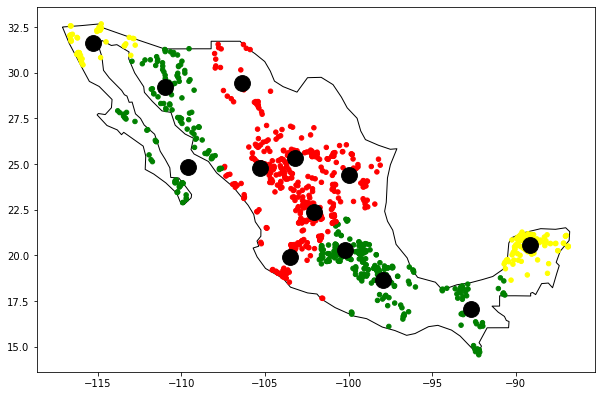

In [53]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

#colores=['red','green','yellow', 'green']
colores=cluster_color_english
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig, ax= plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = ax, edgecolor='black', color='white') #utilizamos el grafico en forma de mapa.
ax.scatter( latlong["LONGITUD"],latlong["LATITUD"], c=asignar,s=20) # se dividiran las tiendas por colores de acuerdo al almacen que las surtira
ax.scatter(centroids["LONGITUD"],centroids["LATITUD"], marker='.', c='black', s=1000) #mostraremos los almacenes con una estrella

The map is divided by 13 clusters, the color is defined by the mode of each cluster.

Lets compare the cluster map with the real data to see if the cluster color make sense

In [54]:
from shapely.geometry import Point
df_AguaSubterraneaCleaned['COORDINATES'] = list(zip(df_AguaSubterraneaCleaned.LONGITUD, df_AguaSubterraneaCleaned.LATITUD))
df_AguaSubterraneaCleaned['COORDINATES'] = df_AguaSubterraneaCleaned['COORDINATES'].apply(Point)

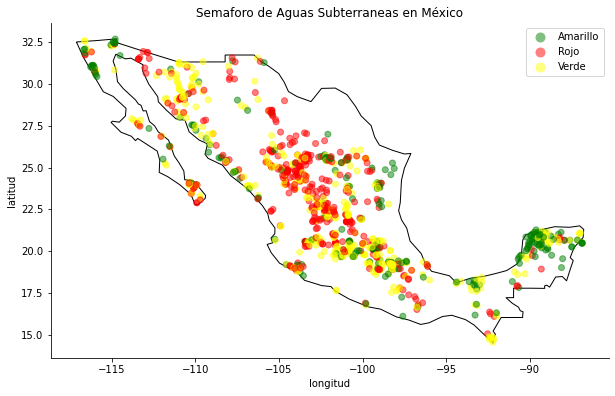

In [55]:
import matplotlib
df_AguaSubterranea_geo = gpd.GeoDataFrame(df_AguaSubterraneaCleaned, geometry="COORDINATES")

fig, gax = plt.subplots(figsize=(10,10))

#ploteando las filas en las cuales el país es México:
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


# Creamos una paleta de colores para los diferentes valores del semaforo:
semaforo_palette = {'Verde': 'green', 'Amarillo': 'yellow', 'Rojo' : 'red'}
cmap = matplotlib.colors.ListedColormap([semaforo_palette[b] for b in df_AguaSubterranea_geo.SEMAFORO.unique()])

# Ploteamos las aguas suberraneas de nuestro GeoDataFrame con la paleta de colores de semaforo:
df_AguaSubterranea_geo.plot(ax=gax, column='SEMAFORO', alpha = 0.5, legend=True, cmap=cmap)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Semaforo de Aguas Subterraneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

As we expected, our clusters match in most cases with the original data. However, there are some cases where it is difficult to distinguish the most frequent color in a zone. Therefore, below, we have printed some graphs showing the "SEMAFORO" distribution per zone.

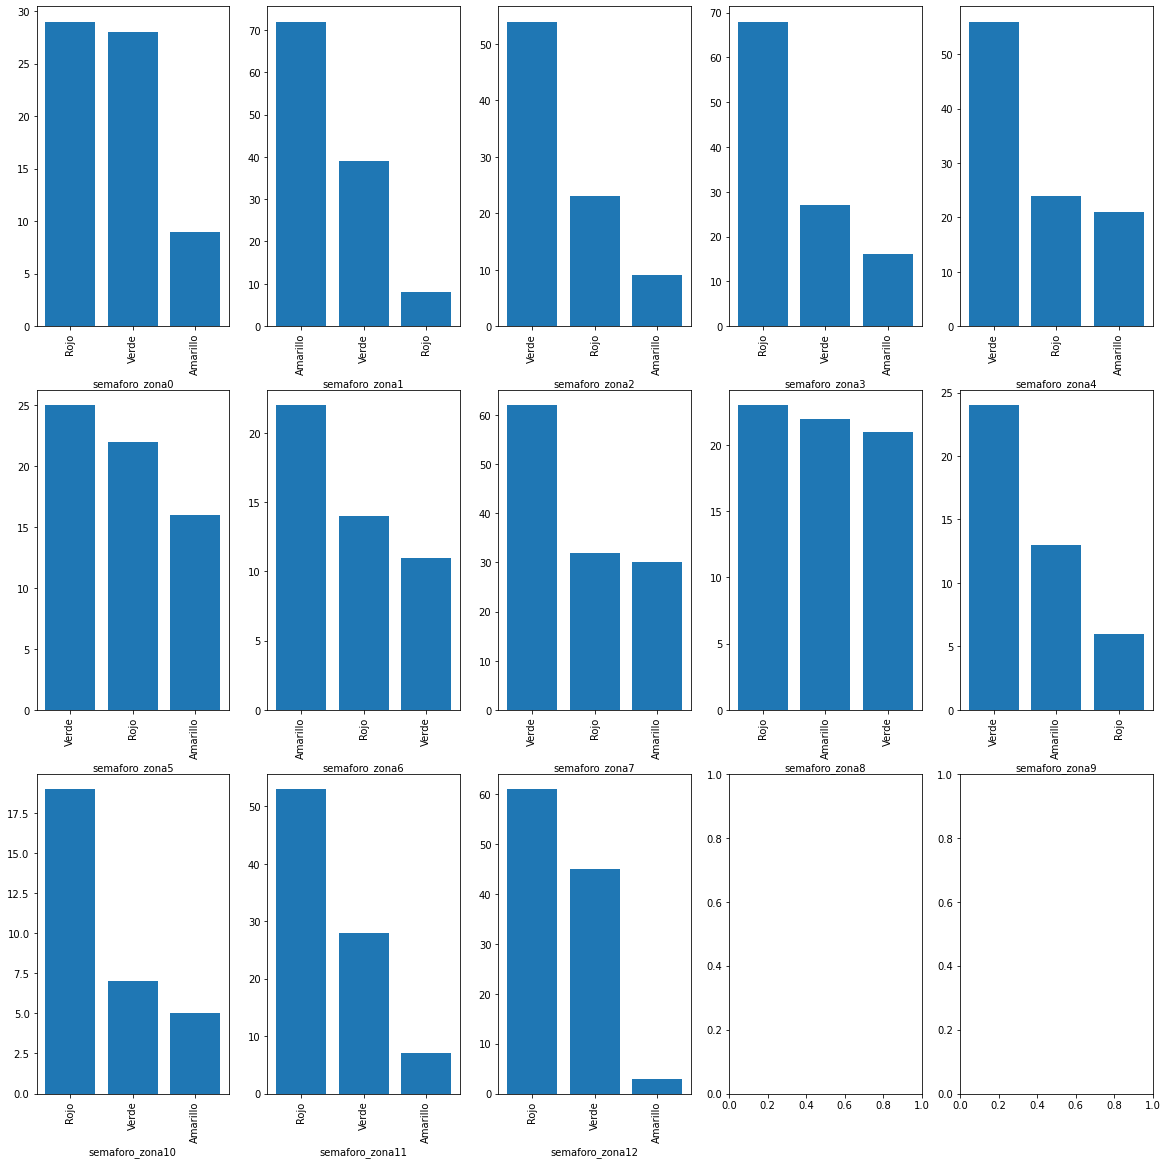

In [56]:
fig, axes = plt.subplots(3, 5, figsize=(20,20)) 
k=0
for zona in semaforo_dicc.keys():
  k=k+1
  plt.subplot(3,5,k) 
  y=pd.Series.value_counts(semaforo_dicc[zona])
  plt.bar(y.index,y.values)
  plt.xticks(rotation=90)
  plt.xlabel(zona)

##Referencias:

CONAGUA. (2020). INDICADORES DE LA CALIDAD DEL AGUA SUPERFICIAL Y SUBTERRÁNEA. CONAGUA. Retrieved November 16, 2022, from http://sina.conagua.gob.mx/sina/mapas/Calidaddelagua.pdf 

Dangeti, P. (2022). Statistics for Machine Learning. O'Reilly Online Learning. Retrieved November 9, 2022, from https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml#:~:text=The%20elbow%20method%20is%20used,by%20different%20values%20of%20k

NA. (2018, March 12). K-Means en Python paso a paso. Aprende Machine Learning. Retrieved November 9, 2022, from https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

#Parte 2

##First Model and Feature Importance

1. Select your independent variables X and dependent Variable Y (semáforo)

In [57]:
transformed_num_data.reset_index(drop=True, inplace=True)
df_AguaSubterraneaCleaned.reset_index(drop=True, inplace=True)

In [58]:
X_names= numericas + categoricas
print('Nuestras variables X independientes seran', X_names)
y_names = ['SEMAFORO']
print('Nuestra variable Y dependiente será', y_names)

Nuestras variables X independientes seran ['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE']
Nuestra variable Y dependiente será ['SEMAFORO']


EXPLICACION DE PORQUE NO USAREMOS EL RESTO

2. Use label encoding in the output variable. This way we will be able to use it on our first model and get feature importance. 

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["Rojo", "Amarillo", "Verde"])
list(le.classes_)

['Amarillo', 'Rojo', 'Verde']

In [60]:
y=df_AguaSubterraneaCleaned.copy()['SEMAFORO']
y.head()

0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo
Name: SEMAFORO, dtype: object

In [61]:
y_encoded=pd.DataFrame(le.transform(y), columns=['SEMAFORO'])
y_encoded.head()

,SEMAFORO
0,2
1,2
2,1
3,2
4,1


In [62]:
X_encoded=pd.DataFrame()
for category in categoricas:
  X_encoded[category]= le.fit_transform(df_AguaSubterraneaCleaned[category])

print(categoricas)

['CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE']


In [63]:
X_encoded.head()

,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
0,4,1,1,1,4,2,0,1,1,1,1,0,0
1,0,3,1,1,4,1,0,1,1,1,1,0,0
2,0,3,1,1,4,2,1,1,1,1,1,0,0
3,0,3,1,1,4,2,0,1,1,1,1,0,0
4,4,0,0,1,0,0,2,1,1,1,1,0,0


In [64]:
X_encoded=pd.concat([transformed_num_data,X_encoded], axis=1)

In [65]:
X_encoded.head()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,...,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
0,6.126837,9.795861,8.451162,0.992138,5.978926,1.032280,1.611461,0.252508,0.144225,0.170998,...,1,4,2,0,1,1,1,1,0,0
1,6.144545,8.471647,7.636894,0.976030,5.698547,1.032280,1.791535,0.237521,0.144225,0.170998,...,1,4,1,0,1,1,1,1,0,0
2,5.895601,8.102839,6.993191,1.217453,4.942256,1.032280,1.131800,0.333222,0.144225,0.170998,...,1,4,2,1,1,1,1,1,0,0
3,6.889419,8.819447,7.822116,1.039394,5.846856,1.032280,1.079681,0.248794,0.144225,0.170998,...,1,4,2,0,1,1,1,1,0,0
4,6.767062,12.256071,10.564232,0.616487,7.813319,6.626705,2.502518,0.215443,0.144225,0.170998,...,1,0,0,2,1,1,1,1,0,0


In [66]:
X_encoded.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin',
       'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS',
       'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN',
       'CALIDAD_FE'],
      dtype='object')

3. Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, train_size=0.85, random_state=5)
model=DecisionTreeClassifier(random_state = 5)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5)

In [68]:
model.feature_importances_

array([0.0232712 , 0.03488747, 0.        , 0.21447352, 0.        ,
       0.10675886, 0.14253826, 0.10248449, 0.0034082 , 0.02883482,
       0.00477428, 0.00319128, 0.08068022, 0.00228975, 0.        ,
       0.        , 0.        , 0.18299082, 0.        , 0.        ,
       0.        , 0.        , 0.00290454, 0.        , 0.01004901,
       0.0010611 , 0.05540218])

In [69]:
df_barModel = pd.DataFrame(model.feature_importances_, index = X_encoded.columns).sort_values(by=[0], ascending = False)
df_barModel = df_barModel.rename(columns={0: "Feature Importance"})
df_barModel["Acumulated"] = np.cumsum(df_barModel["Feature Importance"])
df_barModel

,Feature Importance,Acumulated
FLUORUROS_mg/L,0.214474,0.214474
CALIDAD_DUR,0.182991,0.397464
N_NO3_mg/L,0.142538,0.540003
COLI_FEC_NMP/100_mL,0.106759,0.646761
AS_TOT_mg/L,0.102484,0.749246
MN_TOT_mg/L,0.080680,0.829926
CALIDAD_FE,0.055402,0.885328
CONDUCT_mS/cm,0.034887,0.920216
CR_TOT_mg/L,0.028835,0.949051
ALC_mg/L,0.023271,0.972322


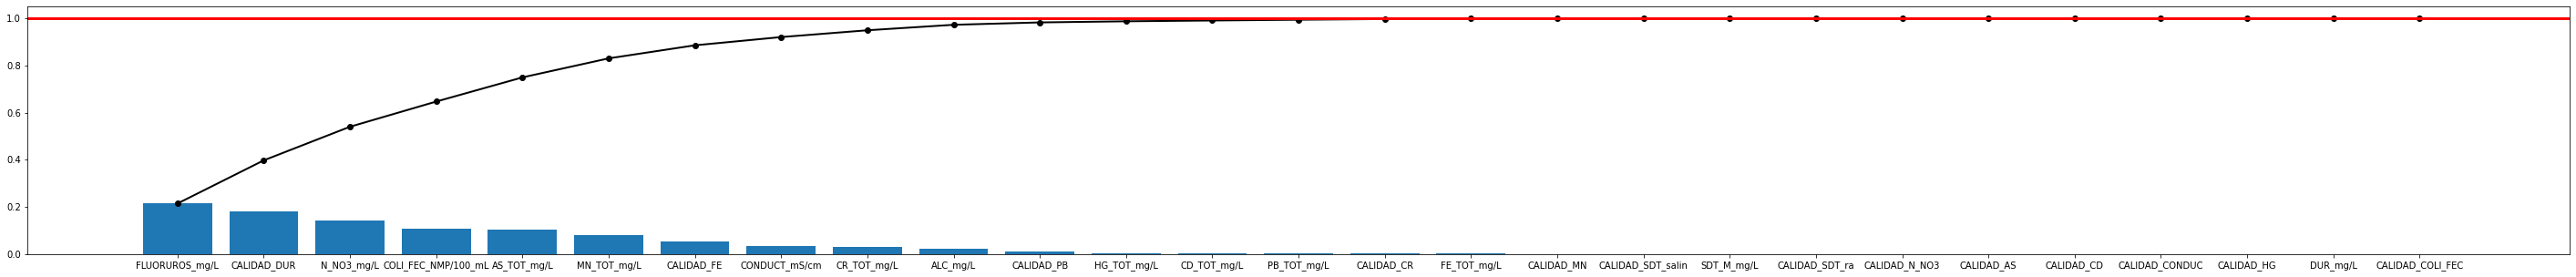

In [70]:
fig = plt.figure(figsize = (50, 5))
plt.bar(df_barModel.index,df_barModel["Feature Importance"])
plt.plot(df_barModel.index,df_barModel["Acumulated"], color='black', marker='.', linewidth = 2,markersize=12)
plt.axhline(y = 1, color = 'r', linestyle = '-',linewidth = 3)

In [71]:
df_barModel[df_barModel['Feature Importance'] == 0].index

Index(['CALIDAD_SDT_salin', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_N_NO3',
       'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CONDUC', 'CALIDAD_HG', 'DUR_mg/L',
       'CALIDAD_COLI_FEC'],
      dtype='object')

In [72]:
important_features= X_encoded.copy().drop(columns=df_barModel[df_barModel['Feature Importance'] == 0].index)

In [73]:
important_features.head()

,ALC_mg/L,CONDUCT_mS/cm,FLUORUROS_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,CALIDAD_DUR,CALIDAD_CR,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
0,6.126837,9.795861,0.992138,1.032280,1.611461,0.252508,0.144225,0.170998,0.07937,0.170998,0.114471,0.446642,1,1,1,0,0
1,6.144545,8.471647,0.976030,1.032280,1.791535,0.237521,0.144225,0.170998,0.07937,0.170998,0.114471,0.292402,1,1,1,0,0
2,5.895601,8.102839,1.217453,1.032280,1.131800,0.333222,0.144225,0.170998,0.07937,0.170998,0.114471,0.292402,1,1,1,0,0
3,6.889419,8.819447,1.039394,1.032280,1.079681,0.248794,0.144225,0.170998,0.07937,0.170998,0.114471,0.292402,1,1,1,0,0
4,6.767062,12.256071,0.616487,6.626705,2.502518,0.215443,0.144225,0.170998,0.07937,0.170998,0.114471,0.292402,1,1,1,0,0


## MODELO: Decision Tree

In [74]:
X_train, X_test, y_train, y_test = train_test_split(important_features, y_encoded, train_size=0.85, random_state=5)

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
model_DT= DecisionTreeClassifier(random_state = 5)

dicc_grid = {'ccp_alpha':[0,0.005,0.01,0.015, 0.02], 'criterion':['gini', 'entropy'],
             'max_depth':[5,10,15,20,25], 
             'min_samples_split': [2,4,6,8], 'class_weight':['balanced', None]}  

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state = 5)

grid_DecisionTree = GridSearchCV(estimator=model_DT, 
                    param_grid=dicc_grid, 
                    cv=cv,
                    n_jobs = -1)

In [76]:
grid_DecisionTree.fit(X_train, np.ravel(y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid_DecisionTree.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid_DecisionTree.best_params_)


Mejor valor de exactitud obtenido con la mejor combinación: 0.9687150837988825
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8}


Accuracy final del modelo:  0.9622641509433962
El reporte de Clasificación para el modelo es:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.98      0.91      0.94        56
           2       0.97      1.00      0.99        66

    accuracy                           0.96       159
   macro avg       0.96      0.96      0.96       159
weighted avg       0.96      0.96      0.96       159



[Text(24.0, 0.5, 'Etiquetas Reales'),
 Text(0.5, 24.0, 'Etiquetas de Predicción')]

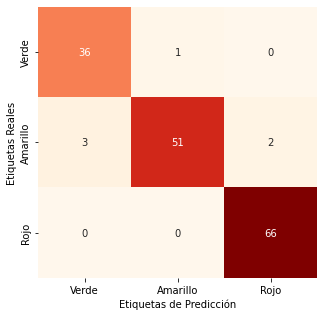

In [77]:
modelo_DT_final= DecisionTreeClassifier(ccp_alpha= 0, class_weight= 'balanced', criterion= 'gini', max_depth= 10, min_samples_split= 8, random_state = 5)

modelo_DT_final.fit(X_train, np.ravel(y_train))

print('Accuracy final del modelo: ', modelo_DT_final.score(X_test, np.ravel(y_test)))

from sklearn.metrics import classification_report, confusion_matrix

pp= modelo_DT_final.predict(X_test)
print('El reporte de Clasificación para el modelo es:\n', classification_report(y_test, pp) )

cm=confusion_matrix(y_test, pp)
df_cm = pd.DataFrame(cm, index = ['Verde','Amarillo','Rojo'], columns = ['Verde','Amarillo','Rojo'])
plt.figure(figsize = (5,5))
ax = sns.heatmap(df_cm, annot=True, cmap='OrRd', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")

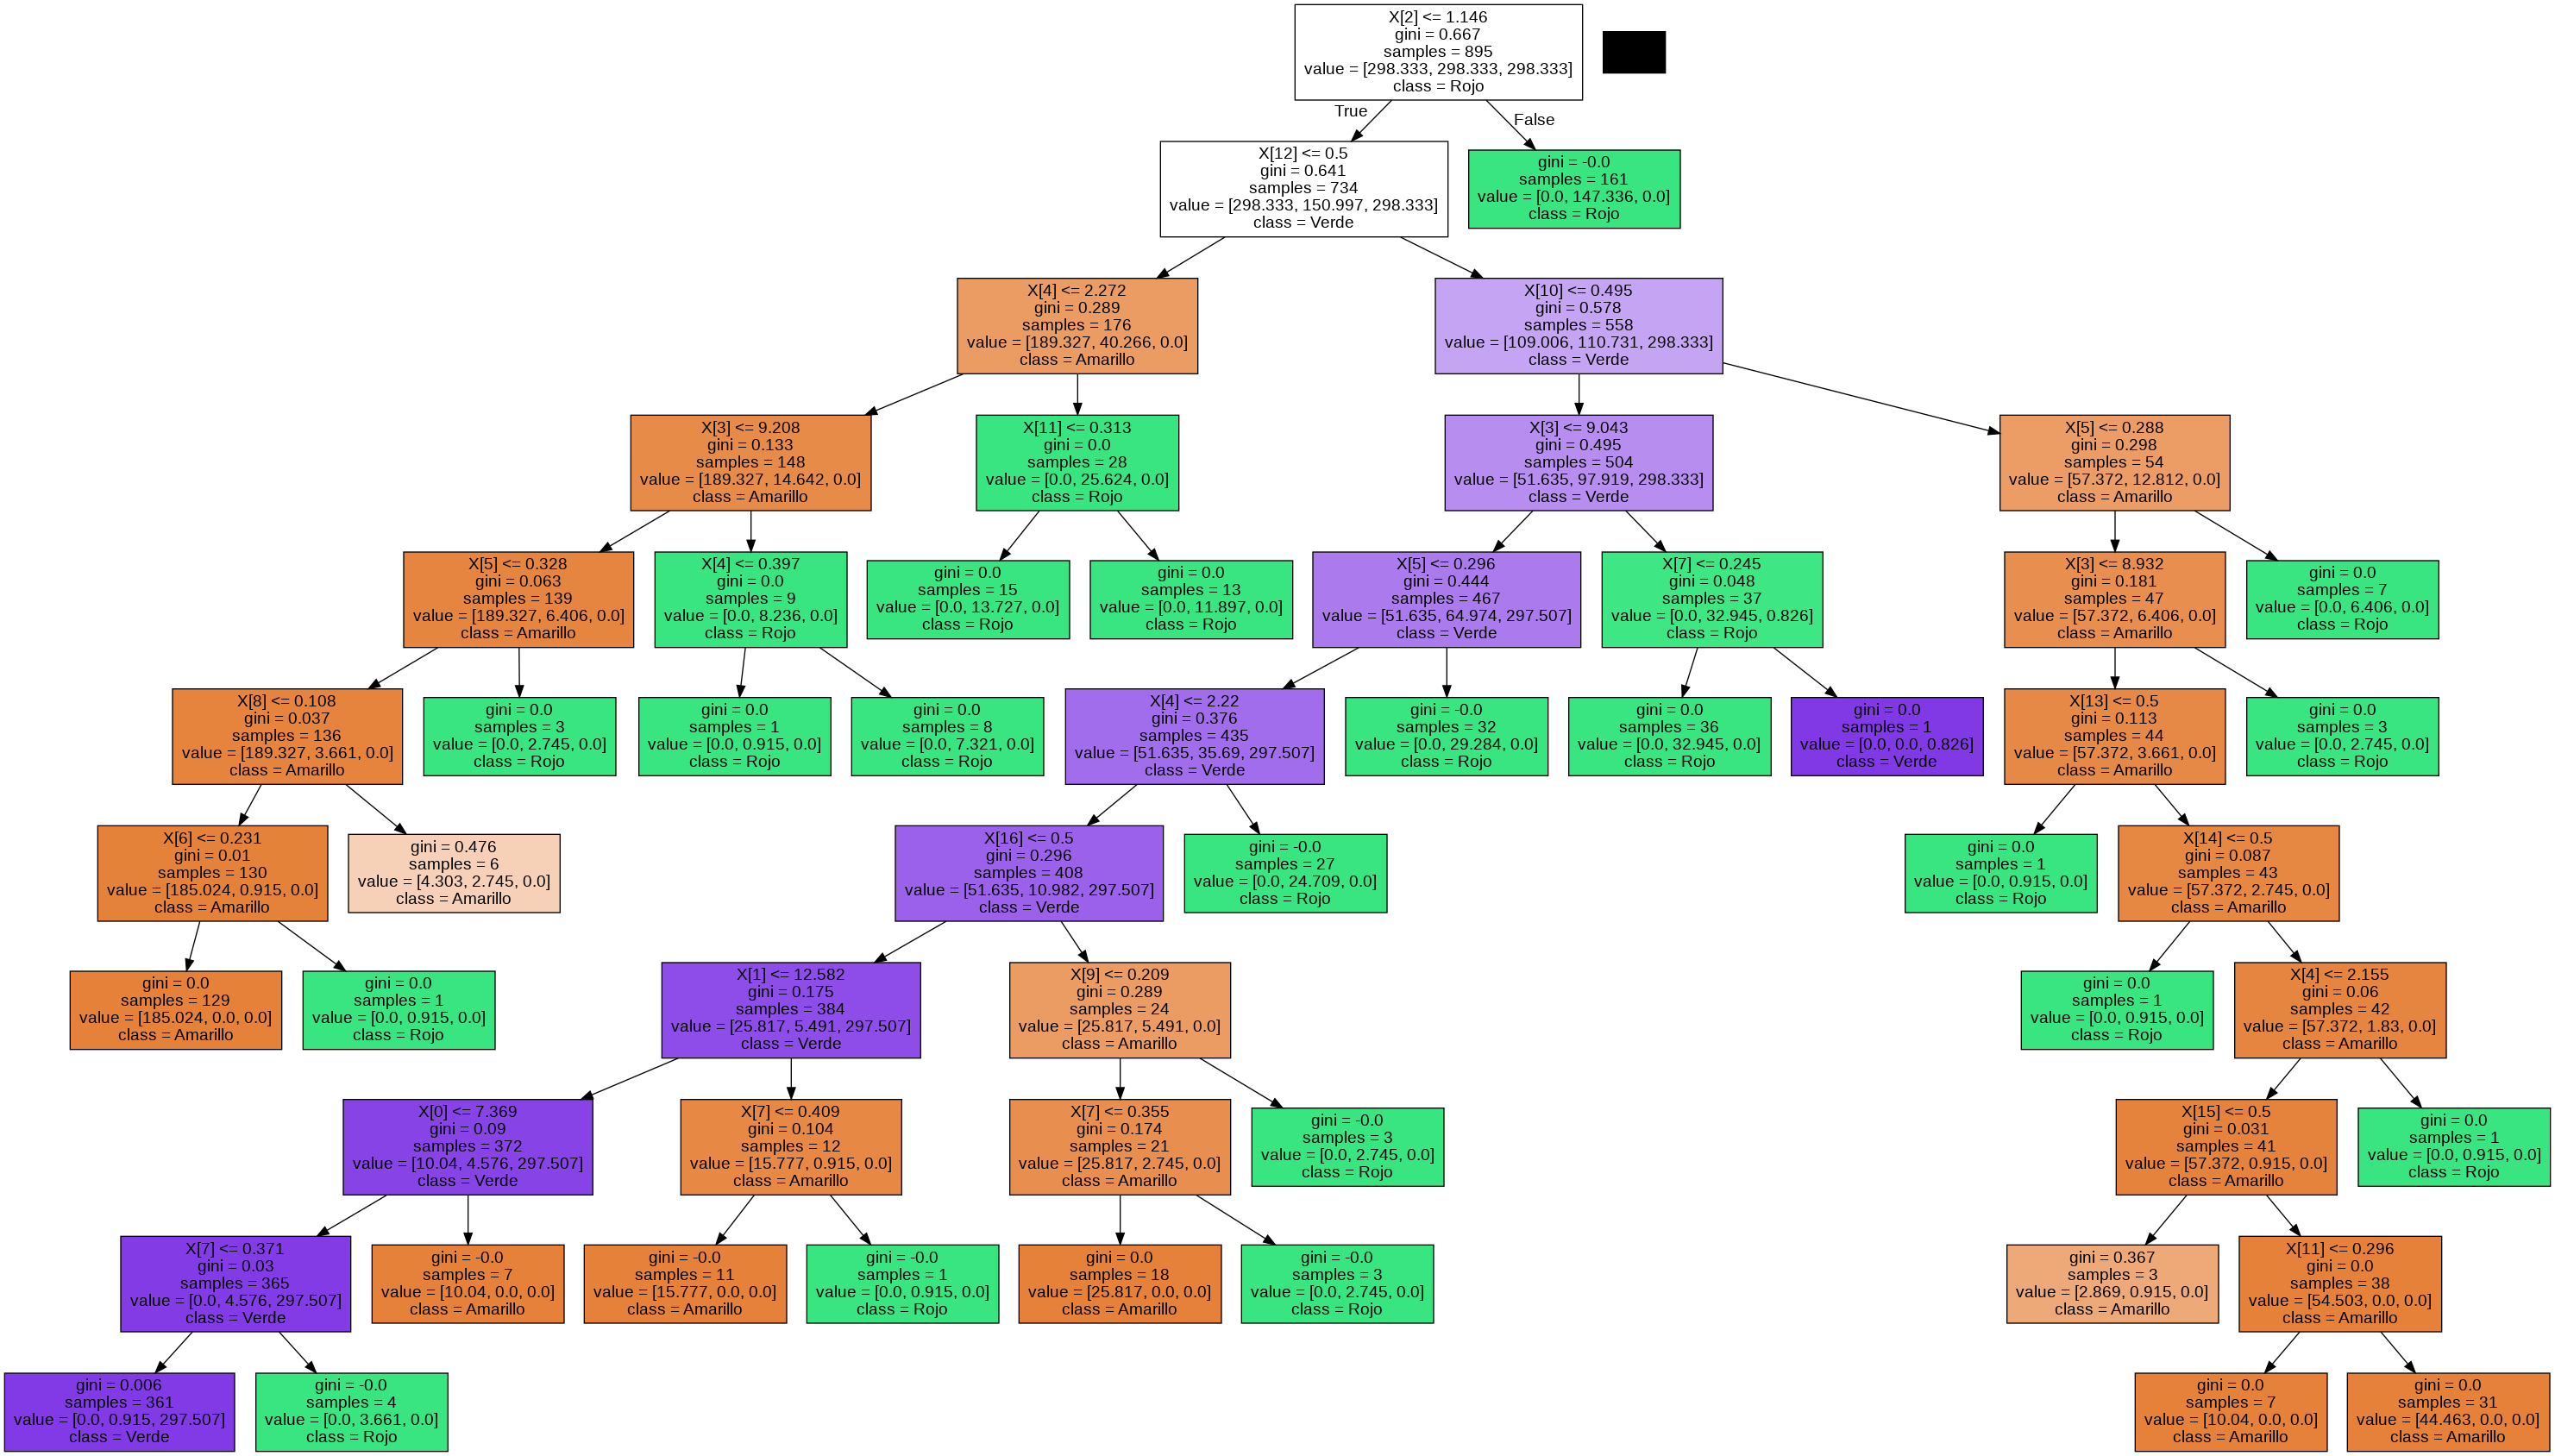

In [87]:
from sklearn import tree
import pydotplus 
from IPython.display import Image
import tempfile

dot_data = tree.export_graphviz(decision_tree= modelo_DT_final,
                                class_names=['Amarillo', 'Rojo','Verde'],
                                filled=True,
                                rotate=False,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## MODELO 2: RANDOM FOREST

In [78]:
from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestClassifier(random_state=5)

dicc_grid = {'ccp_alpha':[0,0.005,0.01,0.015, 0.02], 'criterion':['gini', 'entropy'],
             'max_depth':[5,10,15,20,25], 
             'min_samples_split': [2,4,6,8], 'class_weight':['balanced', None]}  

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)

grid_RF = GridSearchCV(estimator=model_RF, 
                    param_grid=dicc_grid, 
                    cv=cv,
                    n_jobs = -1)

In [79]:
grid_RF.fit(X_train, np.ravel(y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid_RF.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid_RF.best_params_)


Mejor valor de exactitud obtenido con la mejor combinación: 0.9716945996275604
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4}


Accuracy final del modelo:  0.9748427672955975
El reporte de Clasificación para el modelo es:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.93      0.96        56
           2       0.97      1.00      0.99        66

    accuracy                           0.97       159
   macro avg       0.97      0.98      0.97       159
weighted avg       0.98      0.97      0.97       159



[Text(24.0, 0.5, 'Etiquetas Reales'),
 Text(0.5, 24.0, 'Etiquetas de Predicción')]

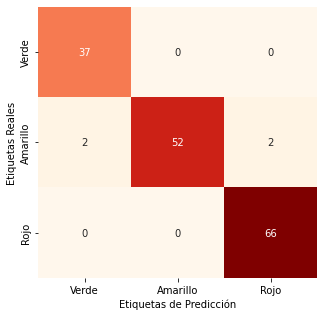

In [80]:
modelo_RF_final= RandomForestClassifier(ccp_alpha= 0, class_weight= None, criterion= 'gini', max_depth= 20, min_samples_split= 4, random_state = 5)

modelo_RF_final.fit(X_train, np.ravel(y_train))

print('Accuracy final del modelo: ', modelo_RF_final.score(X_test, np.ravel(y_test)))

from sklearn.metrics import classification_report, confusion_matrix

pp= modelo_RF_final.predict(X_test)
print('El reporte de Clasificación para el modelo es:\n', classification_report(y_test, pp) )

cm=confusion_matrix(y_test, pp)
df_cm = pd.DataFrame(cm, index = ['Verde','Amarillo','Rojo'], columns = ['Verde','Amarillo','Rojo'])
plt.figure(figsize = (5,5))
ax = sns.heatmap(df_cm, annot=True, cmap='OrRd', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")